In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv(r"/content/drive/MyDrive/batterydata/full_battery_data.csv")


In [23]:
df.head()

,Time,Voltage,Current,Temperature,SOC,DriveCycle,TemperatureLabel
0,0.0,4.175155,-3.691549e-06,15.96381,1.0,PDTCB,15
1,0.1,4.175155,-9.512327e-07,15.96381,1.0,PDTCB,15
2,0.2,4.174967,-4.821614e-07,15.96381,1.0,PDTCB,15
3,0.3,4.175153,-2.413463e-07,15.96381,1.0,PDTCB,15
4,0.4,4.174966,-8.059866e-08,15.96381,1.0,PDTCB,15


In [24]:
if df["SOC"].max() > 1.0:
    df["SOC"] = df["SOC"] / 100.0

features = ['Voltage', 'Current', 'Temperature']
target = 'SOC'

X = df[features].values
y = df[target].values


In [25]:
# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
dt_model = DecisionTreeRegressor(
    max_depth=20,         # You can tune this
    min_samples_split=10, # Avoid overfitting
    random_state=42
)


In [27]:
print("⏳ Training Decision Tree...")
dt_model.fit(X_train, y_train)
print("✅ Training complete.")


⏳ Training Decision Tree...
✅ Training complete.


In [28]:
joblib.dump(dt_model, "decision_tree_soc_model.pkl")
print("✅ Model saved as 'decision_tree_soc_model.pkl'")


✅ Model saved as 'decision_tree_soc_model.pkl'


In [29]:
y_pred = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [30]:
print(f"📊 MAE:  {mae:.3f}")
print(f"📊 RMSE: {rmse:.3f}")
print(f"📊 R²:   {r2:.3f}")

📊 MAE:  0.003
📊 RMSE: 0.007
📊 R²:   0.999


/tmp/ipython-input-31-1390166867.py:9: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


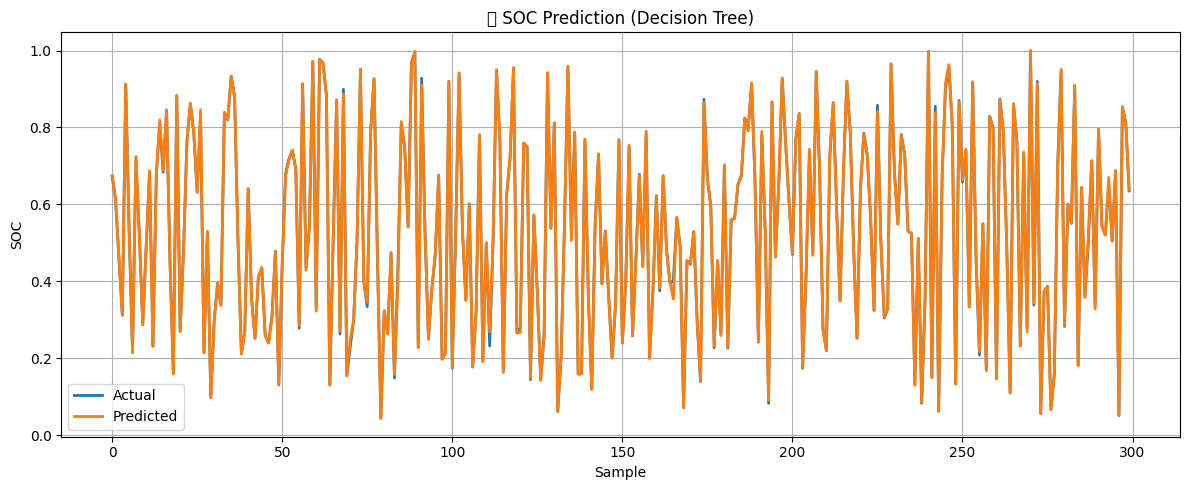

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred[:300], label='Predicted', linewidth=2)
plt.title("🔋 SOC Prediction (Decision Tree)")
plt.xlabel("Sample")
plt.ylabel("SOC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-32-3618415681.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


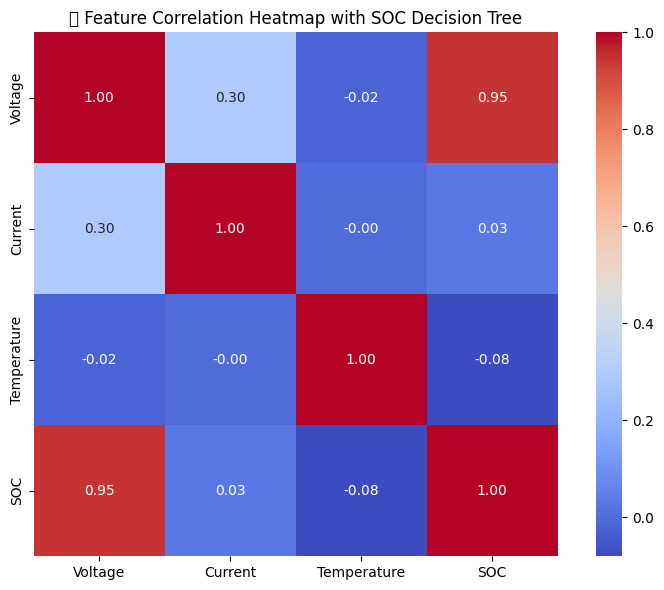

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = pd.DataFrame(X_test, columns=['Voltage', 'Current', 'Temperature'])
df_corr['SOC'] = y_test
corr_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("📊 Feature Correlation Heatmap with SOC Decision Tree")
plt.tight_layout()
plt.show()


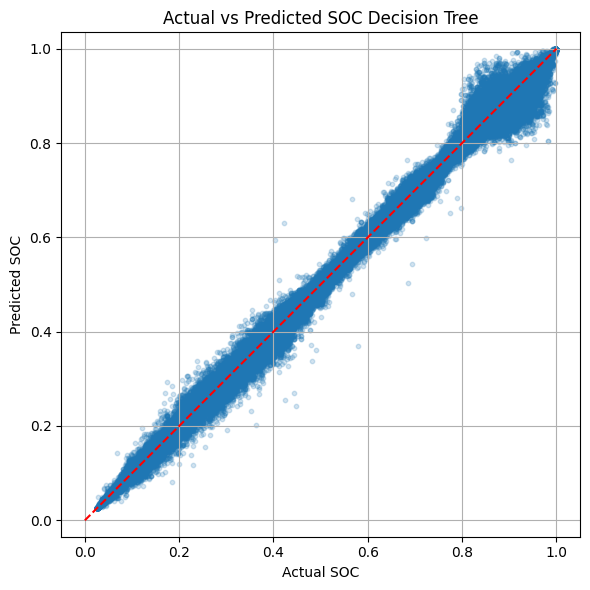

In [33]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2, s=10)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal line
plt.title("Actual vs Predicted SOC Decision Tree")
plt.xlabel("Actual SOC")
plt.ylabel("Predicted SOC")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
